# Regresión lineal multivariable

Volveremos a trabajar con el dataset **"Housing"** para poder **predecir el valor medio de las viviendas en diferentes zonas de Boston (MEDV)**.

Nos ayudaremos con los resultados obtenidos del análisis previo de en el **análisis de correlación**.

En particular, buscaremos **las variables que tengan la mayor correlación con nuestra variable de respuesta, "MEDV"**. A partir de esto, **podremos seleccionar un conjunto de variables predictoras que nos permitan construir un modelo de regresión lineal múltiple** que tenga una alta capacidad predictiva y que pueda ser utilizado para estimar los valores de "MEDV" en otras zonas de Boston.


## Importando los datos y librerias necesarias


In [1]:
import pandas as pd

df = pd.read_csv("../data/housing.data", header=None, sep="\s+")

df.columns = [
    "CRIM",
    "ZN",
    "INDUS",
    "CHAS",
    "NOX",
    "RM",
    "AGE",
    "DIS",
    "RAD",
    "TAX",
    "PTRATIO",
    "B",
    "LSTAT",
    "MEDV",
]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Entendiendo los datos

Una vez descargados los datos lo que hay que hacer es entenderlos. Es importante saber que el algoritmo de regresión lineal se basa altamente en correlaciones por lo que yo recomiendo que empecemos viendo un gráfico de correlaciones usando pairplot de Seaborn.


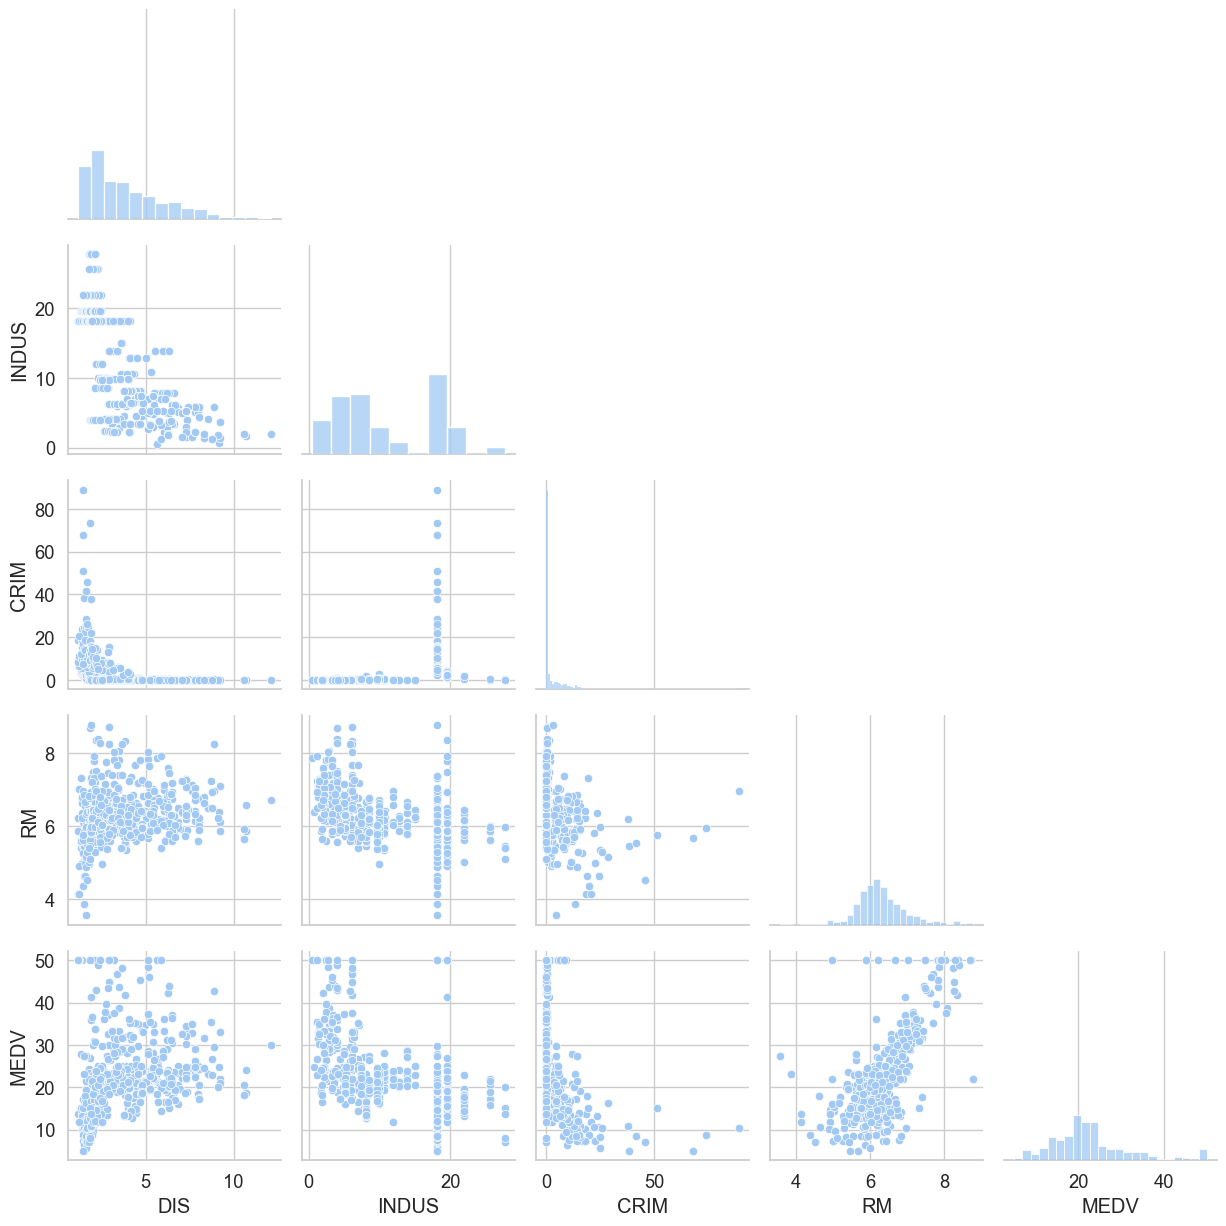

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Dar estilos predefinidos
sns.set_theme(style="whitegrid", context="notebook", palette="pastel", font_scale=1.2)

# Escoger 5 variables importantes para hacer relaciones entre ellas y como se distribuyen entre ellas
cols = ["DIS", "INDUS", "CRIM", "RM", "MEDV"]

# Hacer el primer grafico
sns.pairplot(df[cols], height=2.5, corner=True)


plt.tight_layout()
plt.show()

Una vez que se ve cómo están correlacionadas las variables de manera visual es importante usar un método numérico para poder entender las correlaciones.


<Axes: >

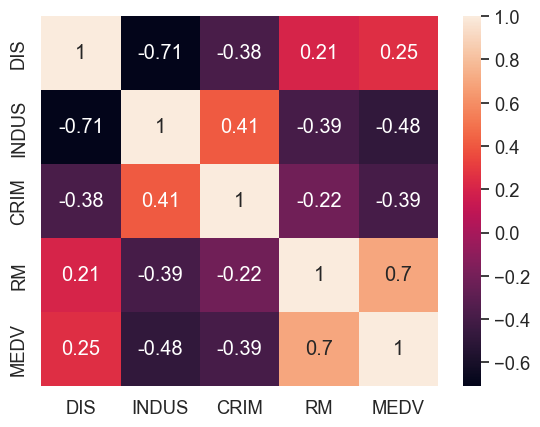

In [3]:
# cm = np.corrcoef(house_df[cols].values.T)
sns.heatmap(df[cols].corr(), cbar=True, annot=True, yticklabels=cols, xticklabels=cols)

En nuestro análisis de correlación previo mencionamos que las **variables que tienen la correlación más fuerte con nuestra variable de respuesta "MEDV"** son la cantidad promedio de habitaciones por vivienda **(RM)** y la proporción de acres de negocios no minoristas por ciudad **(INDUS)**.


## Creando modelo con sklearn -> Regresion Lineal Multivariable

Los pasos para crear un modelo de regresión lineal múltiple en Python son muy similares a los de una regresión lineal simple que hicimos anteriormente.

La principal diferencia radica en la selección de la variable X, donde en la regresión lineal simple se usa una única variable predictora, mientras que en la regresión lineal múltiple se usan varias variables predictoras.


In [4]:
# Escalamiento de los datos -> ajustando el modelo
from sklearn.preprocessing import StandardScaler

# importar el modelo de regresion lineal
from sklearn.linear_model import LinearRegression

# Definir las variables dependientes y independientes
X = df[["RM", "INDUS"]].values  # Variables independientes
y = df["MEDV"].values.reshape(-1, 1)  # Variable dependiente

# Instanciamos el modelo de escalamiento de los datos
sc_x = StandardScaler()
sc_y = StandardScaler()


# Ajustar los datos estandarizados z = (x - u) / std
X_std = sc_x.fit_transform(X)
Y_std = sc_y.fit_transform(y)


slr = LinearRegression()
# Entrenar el modelo con los datos estandarizado
slr.fit(X_std, Y_std)

LinearRegression()

## Análisis de regresión multivariable


c:\Users\mike\Documents\datos\ML-Regresion-Lineal\venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


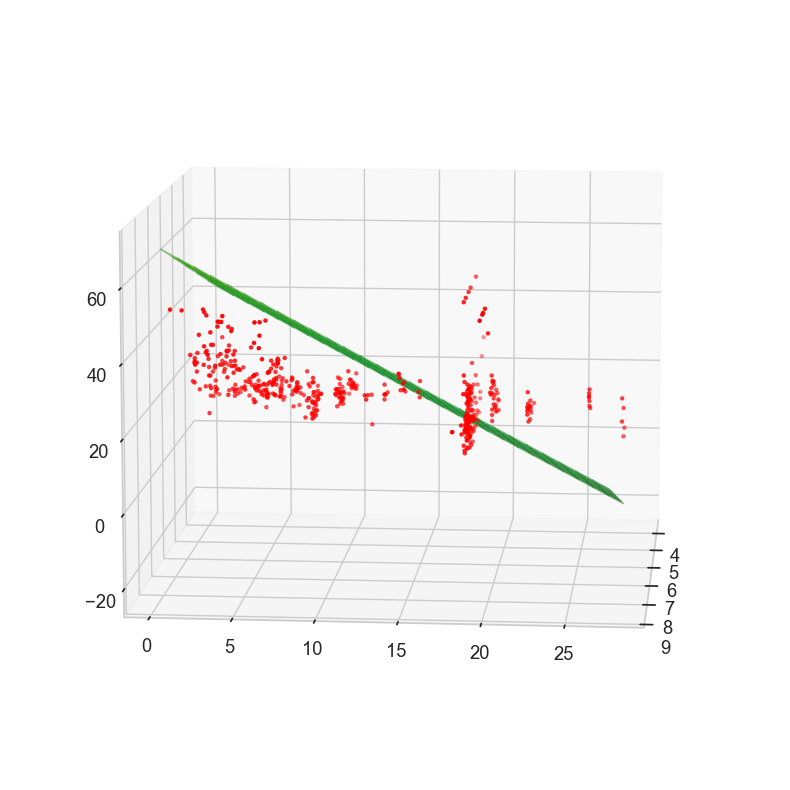

In [5]:
# Herramientas para graficas en 3D
from mpl_toolkits.mplot3d import *
import numpy as np


# Definir el rango de valores para la variable predictiva 'RM'
x1_range = np.arange(df["RM"].min(), df["RM"].max())
# Definir el rango de valores para la variable predictiva 'INDUS'
x2_range = np.arange(df["INDUS"].min(), df["INDUS"].max())

# # crear una malla de puntos que cubra los rangos de valores de ambas variables predictoras
X1, X2 = np.meshgrid(x1_range, x2_range)

# crear un dataframe con todas las combinaciones posibles de valores de ambas variables predictoras
plano = pd.DataFrame({"RM": X1.ravel(), "INDUS": X2.ravel()})

# utilizar los coeficientes y la intercepción del modelo de regresión lineal múltiple ajustado para hacer predicciones en el plano creado
pred = slr.predict(plano).reshape(X1.shape)

#  escalar las predicciones inversamente utilizando el objeto sc_y para obtener los valores reales de la variable de respuesta "MEDV"
pred = sc_y.inverse_transform(pred)

# Graficar la prediccion en 3D
fig = plt.figure(figsize=(10, 10))
# Grafica en 3 Dimensiones
ax = fig.add_subplot(111, projection="3d")
# Graficar una superficie
ax.plot_surface(X1, X2, pred, alpha=0.4, color="green", cmap="viridis")

ax.scatter(df["RM"], df["INDUS"], df["MEDV"], c="red", marker=".")

ax.view_init(elev=10, azim=5)

plt.show()

El código se encarga de crear un plano de predicción para el modelo de regresión lineal múltiple. Primero, se definen los rangos de valores para cada variable predictiva "RM" e "INDUS" utilizando la función arange() de Numpy. Luego, se utiliza la función meshgrid() de Numpy para crear una malla de puntos que cubra todos los valores posibles de ambas variables predictivas.


In [6]:
# Definir el rango de valores para la variable predictiva 'RM'
x1_range = np.arange(df["RM"].min(), df["RM"].max())
# Definir el rango de valores para la variable predictiva 'INDUS'
x2_range = np.arange(df["INDUS"].min(), df["INDUS"].max())

# # crear una malla de puntos que cubra los rangos de valores de ambas variables predictoras
X1, X2 = np.meshgrid(x1_range, x2_range)

El código se encarga de crear un plano de predicción para el modelo de regresión lineal múltiple. Primero, se definen los rangos de valores para cada variable predictiva "RM" e "INDUS" utilizando la función arange() de Numpy. Luego, se utiliza la función meshgrid() de Numpy para crear una malla de puntos que cubra todos los valores posibles de ambas variables predictivas.


In [7]:
# crear un dataframe con todas las combinaciones posibles de valores de ambas variables predictoras
plano = pd.DataFrame({"RM": X1.ravel(), "INDUS": X2.ravel()})
plano.T

,0,1,2,3,4,5,6,7,8,9,...,158,159,160,161,162,163,164,165,166,167
RM,3.561,4.561,5.561,6.561,7.561,8.561,3.561,4.561,5.561,6.561,...,5.561,6.561,7.561,8.561,3.561,4.561,5.561,6.561,7.561,8.561
INDUS,0.460,0.460,0.460,0.460,0.460,0.460,1.460,1.460,1.460,1.460,...,26.460,26.460,26.460,26.460,27.460,27.460,27.460,27.460,27.460,27.460


A continuación, se crea un dataframe llamado plano con todas las combinaciones posibles de valores de ambas variables predictivas, utilizando la función ravel() de Numpy para aplanar las matrices X1 y X2 y crear dos columnas con los valores correspondientes para "RM" e "INDUS".


In [8]:
# utilizar los coeficientes y la intercepción del modelo de regresión lineal m�ltiple ajustado para hacer predicciones en el plano creado
pred = slr.predict(plano).reshape(X1.shape)

#  escalar las predicciones inversamente utilizando el objeto sc_y para obtener los valores reales de la variable de respuesta "MEDV"
pred = sc_y.inverse_transform(pred)

c:\Users\mike\Documents\datos\ML-Regresion-Lineal\venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Finalmente, se utilizan los coeficientes y la intercepción del modelo de regresión lineal múltiple ajustado para hacer predicciones en el plano creado.

Estas predicciones se escalan inversamente utilizando el objeto sc_y para obtener los valores reales de la variable de respuesta "MEDV". El resultado es un objeto pred que contiene todos los valores predichos para el plano creado.


In [9]:
import plotly.graph_objects as go

# Graficar la predicción en 3D utilizando plotly
fig = go.Figure(
    data=[
        go.Surface(x=X1, y=X2, z=pred, colorscale="Viridis", opacity=0.7),
        go.Scatter3d(
            x=df["RM"],
            y=df["INDUS"],
            z=df["MEDV"],
            mode="markers",
            marker=dict(size=4, color="red"),
        ),
    ]
)

fig.update_layout(
    title="Predicción de precios de viviendas en función de RM y INDUS",
    scene=dict(
        xaxis_title="Promedio de habitaciones",
        yaxis_title="Proporción de negocios no minoristas por ciudad",
        zaxis_title="Precio de la vivienda",
    ),
    autosize=False,
    width=800,
    height=800,
    margin=dict(l=65, r=50, b=65, t=90),
)

fig.show()